In [21]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
years = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]

Task 1. Plot the populations for the years in the period. Add legend and axis labels to the plot.

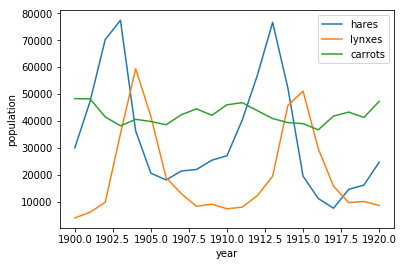

In [20]:
plt.plot(years, hares, label = 'hares')
plt.plot(years, lynxes, label = 'lynxes')
plt.plot(years, carrots, label = 'carrots')
plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.show()

Task 2. Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

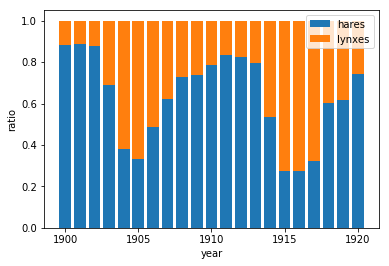

In [26]:
sum = hares + lynxes
plt.bar(years, hares/sum, label = 'hares')
plt.bar(years, lynxes/sum, bottom = hares/sum, label = 'lynxes')
plt.xlabel('year')
plt.ylabel('ratio')
plt.legend()
plt.show()

Task 3. Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

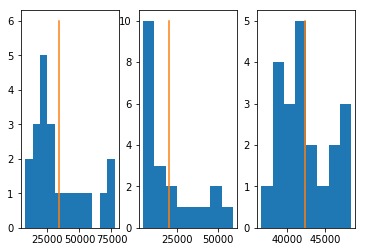

In [119]:
fig, ax = plt.subplots(1,3)

ax[0].hist(hares,bins=12)
ax[0].plot([hares.mean(),hares.mean()],[0,6]);

ax[1].hist(lynxes,bins=8)
ax[1].plot([lynxes.mean(),lynxes.mean()],[0,10]);

ax[2].hist(carrots,bins=8)
ax[2].plot([carrots.mean(),carrots.mean()],[0,5]);

Task 4. Find which year each species had the largest population. Mark these years in the plot of populations.

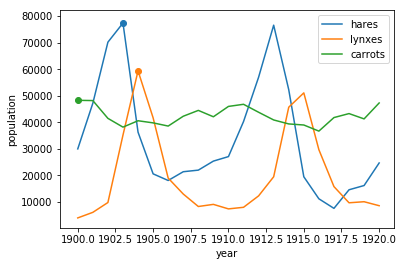

In [97]:
plt.plot(years, hares, label = 'hares')
plt.scatter([years[hares.argmax()]],[hares.max()])
plt.plot(years, lynxes, label = 'lynxes')
plt.scatter([years[lynxes.argmax()]],[lynxes.max()])
plt.plot(years, carrots, label = 'carrots')
plt.scatter([years[carrots.argmax()]],[carrots.max()])
plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.show()

Task 5. 
Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


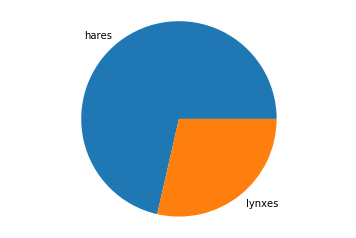

In [142]:
A = np.array([np.argmax(data[i,1:3]) for i in range(data.shape[0])])
B = np.array([A[i]*'L'+(1-A[i])*'H' for i in range(A.shape[0])])
print(B)
fig, ax = plt.subplots()
ax.pie([np.count_nonzero(B=='H'),np.count_nonzero(B=='L')], labels = ['hares','lynxes']);
ax.axis('equal');

Task 6. Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

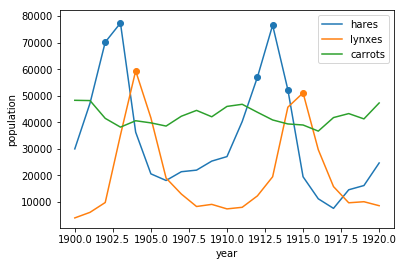

In [166]:
hahares = np.ma.masked_where(hares<50000,hares)
lylynxes = np.ma.masked_where(lynxes<50000,lynxes)
cacarrots = np.ma.masked_where(carrots<50000,carrots)

plt.plot(years, hares, label = 'hares')
plt.scatter(years, hahares)
plt.plot(years, lynxes, label = 'lynxes')
plt.scatter(years,lylynxes)
plt.plot(years, carrots, label = 'carrots')
plt.scatter(years,cacarrots)
plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.show()

Task 7. Find the top 2 years for each species when they had the lowest populations.

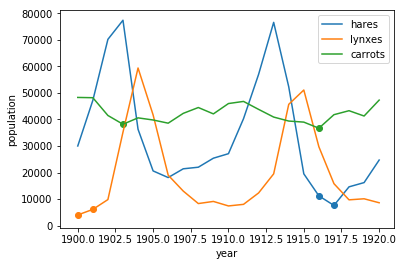

In [170]:
hh = np.argsort(hares)[:2]
ll = np.argsort(lynxes)[:2]
cc = np.argsort(carrots)[:2]

plt.plot(years, hares, label = 'hares')
plt.scatter(years[hh], hares[hh])
plt.plot(years, lynxes, label = 'lynxes')
plt.scatter(years[ll], lynxes[ll])
plt.plot(years, carrots, label = 'carrots')
plt.scatter(years[cc], carrots[cc])
plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.show()

Task 8. Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

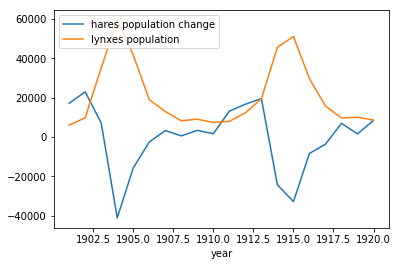

correlation coefficient =  -0.8494801603656876


In [182]:
plt.plot(years[1:], np.diff(hares), label = 'hares population change')
plt.plot(years[1:], lynxes[1:], label = 'lynxes population')
plt.xlabel('year')
plt.legend()
plt.show()
print("correlation coefficient = ", np.corrcoef(np.diff(hares),lynxes[1:])[0,1])

Task 9. Show population of hares vs carrots and hares vs lynxes.

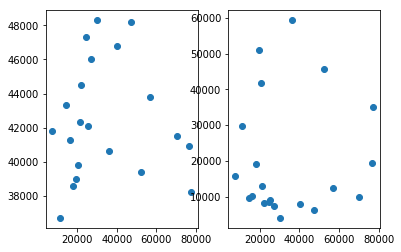

In [194]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(hares,carrots)
ax[1].scatter(hares,lynxes);

Task 10. Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

пробуем линейно экстраполировать зависимость количества зайцев от морковок и лис, и взять среднее от полученных прогнозов

In [238]:
A = np.vstack([carrots,np.ones(len(carrots))]).T
m, c = np.linalg.lstsq(A, hares, rcond = None)[0]
A = np.vstack([lynxes,np.ones(len(lynxes))]).T
M, C = np.linalg.lstsq(A, hares, rcond = None)[0]

hares_est_1 = m * carrots[-1] + c
hares_est_2 = M * lynxes[-1] + C

hares_est = (hares_est_1+hares_est_2)/2

print("predicted value =", hares_est)
print("real value =", hares[-1])
print("error =", abs(hares_est - hares[-1]))
print("ratio =", abs(hares_est - hares[-1])/hares[-1])

predicted value = 33290.540940833365
real value = 24700.0
error = 8590.540940833365
ratio = 0.3477951797908245


погрешность получилась большая. можем взять просто медиану:

In [242]:
hares_est = np.median(hares[:len(hares)-1])

print("predicted value =", hares_est)
print("real value =", hares[-1])
print("error =", abs(hares_est - hares[-1]))
print("ratio =", abs(hares_est - hares[-1])/hares[-1])

predicted value = 26250.0
real value = 24700.0
error = 1550.0
ratio = 0.06275303643724696


так вышло гораздо лучше